In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


Introduction
Data preparation ->Load data ->Check for null and missing values ->Normalization ->Reshape ->Label encoding ->Split training and valdiation set
CNN ->Define the model ->Set the optimizer and annealer ->Data augmentation
Evaluate the model ->Training and validation curves ->Confusion matrix
Prediction and submition ->Predict and Submit results

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from PIL import Image
import tensorflow as tf
pd.options.display.max_rows = 999
pd.options.display.max_columns= 999
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot

In [25]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [26]:
x_train = df_train.drop(['label'] , axis = 1)
y_train = df_train['label']

In [27]:
x_train.shape

(42000, 784)

In [28]:
y_train.shape

(42000,)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2 , random_state=42)

In [30]:
X_train.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54     int64
pixel55   

In [31]:
X_test.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54     int64
pixel55   

In [32]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
X_test = X_test.values.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')

In [33]:
X_train[1]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [34]:
import matplotlib.pyplot as plt
print("the number of training examples = %i" % X_train.shape[0])
print("the number of classes = %i" % len(np.unique(y_train)))
print("Dimention of images = {:d} x {:d}  ".format(X_train[1].shape[0],X_train[1].shape[1])  )

the number of training examples = 33600
the number of classes = 10
Dimention of images = 28 x 28  


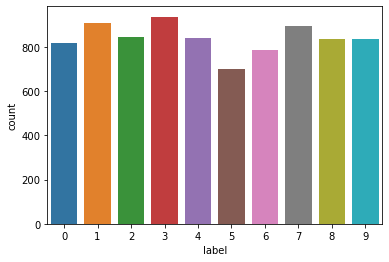

In [35]:
sns.countplot(Y_test)

In [36]:
from keras.layers import Dropout
from keras import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(100, kernel_size=3, padding="valid", input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units= 500, activation='relu'  ))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train).astype('int32')
Y_test = np_utils.to_categorical(Y_test)

In [38]:
from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

datagen.fit(X_train)

train_generator = datagen.flow(X_train, Y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(X_train, Y_train, batch_size=60, subset='validation')


# fits the model on batches with real-time data augmentation:
history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 30,
                    workers=-1)


Epoch 1/30
8/7 [================================] - 5s 581ms/step - loss: 2.0963 - accuracy: 0.3958 - val_loss: 0.9911 - val_accuracy: 0.7000
Epoch 2/30
8/7 [================================] - 4s 556ms/step - loss: 0.7880 - accuracy: 0.7312 - val_loss: 0.3176 - val_accuracy: 0.9083
Epoch 3/30
8/7 [================================] - 5s 573ms/step - loss: 0.5030 - accuracy: 0.8333 - val_loss: 0.5569 - val_accuracy: 0.8167
Epoch 4/30
8/7 [================================] - 4s 562ms/step - loss: 0.3708 - accuracy: 0.8875 - val_loss: 0.2591 - val_accuracy: 0.9333
Epoch 5/30
8/7 [================================] - 4s 556ms/step - loss: 0.2890 - accuracy: 0.9042 - val_loss: 0.3246 - val_accuracy: 0.8833
Epoch 6/30
8/7 [================================] - 4s 561ms/step - loss: 0.2932 - accuracy: 0.9187 - val_loss: 0.1457 - val_accuracy: 0.9417
Epoch 7/30
8/7 [================================] - 4s 556ms/step - loss: 0.3015 - accuracy: 0.9000 - val_loss: 0.1479 - val_accuracy: 0.9667
Epoch 

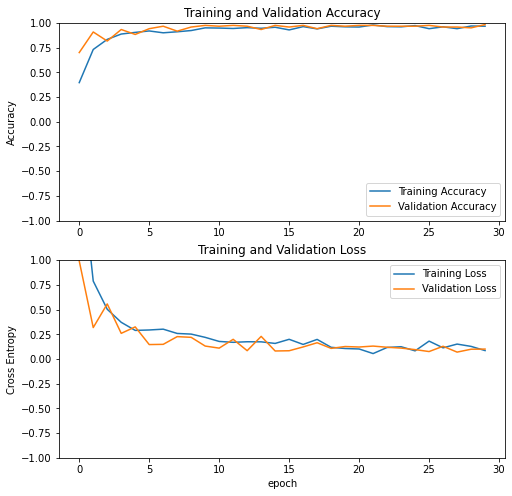

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [41]:
scores = model.evaluate(X_test, Y_test, verbose = 15 )
print ( scores )

[4.691592693328857, 0.9742857217788696]


In [42]:
test_set = (df_test.values).reshape(-1, 28, 28 , 1).astype('float32')

In [43]:
import numpy
res = model.predict(test_set)
res = numpy.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.to_csv("My_submission.csv",index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [44]:
from IPython.display import FileLink
FileLink(r'My_submission.csv')

/kaggle/working/My_submission.csv